In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [32]:
copi = pd.read_csv('data/stavby.csv', encoding='utf-8') # construction production index

In [28]:
copi = copi[['hodnota', 'mesic', 'rok', 'mesicz', 'rokz' , 'casz_txt', 'stavprace_txt', 'oceneni_txt', 'ocisteni_txt']]
print(f'Before:\n{copi.dtypes}\n')
# todo stringy

Before:
hodnota          float64
mesic              int64
rok                int64
mesicz           float64
rokz               int64
casz_txt          object
stavprace_txt     object
oceneni_txt       object
ocisteni_txt      object
dtype: object



In [29]:
print(copi['casz_txt'].unique())
print(copi['oceneni_txt'].unique())
print(copi['ocisteni_txt'].unique())
print(copi['stavprace_txt'].unique())

['stejné období předchozího roku' 'průměr bazického roku']
['běžné ceny' 'stálé (průměrné) ceny roku']
['neočištěno' 'sezónně očištěno, včetně očištění o kalendářní vlivy'
 'očištěno o kalendářní vlivy, není očištěno o sezónní vlivy']
['Stavební práce celkem' 'Inženýrské stavitelství' 'Pozemní stavitelství']


In [36]:
copi = copi[copi['stavprace_txt'] == 'Stavební práce celkem']
copi = copi[copi['oceneni_txt'] == 'běžné ceny']
#copi = copi[copi['ocisteni_txt'] == 'sezónně očištěno, včetně očištění o kalendářní vlivy']
copi_monthly = copi[copi['casz_txt'] == 'stejné období předchozího roku']


In [11]:
total = copi[copi['casz_txt'] == 'stejné období předchozího roku']
dirty = total[total['ocisteni_txt'] == 'neočištěno']
dirty = dirty[dirty['oceneni_txt'] == 'běžné ceny']

In [15]:
dirty.sort_values(['rok', 'mesic'], inplace=True)
dirty['datum'] = dirty['mesic'].astype(str) + '/' + dirty['rok'].astype(str)

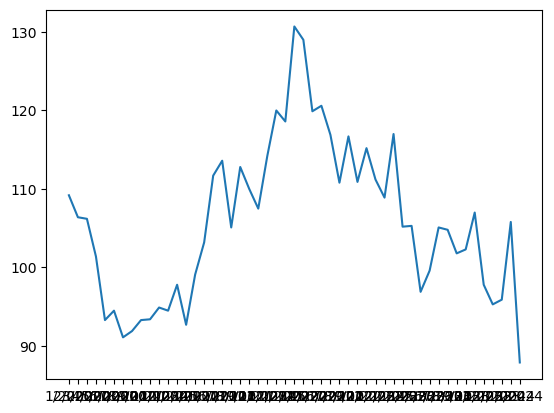

In [16]:
plt.plot(dirty['datum'], dirty['hodnota'])

In [37]:
copi_monthly

,idhod,hodnota,stapro_kod,casz_cis,casz_kod,stavprace_cis,stavprace_kod,oceneni_cis,oceneni_kod,ocisteni_cis,ocisteni_kod,mesic,rok,mesicz,rokz,stapro_txt,casz_txt,stavprace_txt,oceneni_txt,ocisteni_txt
0,1267033748,109.2,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,1,2020,1.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
12,1267060356,106.4,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,2,2020,2.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
24,1267063493,101.4,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,4,2020,4.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
36,1267047397,93.3,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,5,2020,5.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
48,1267040190,106.2,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,3,2020,3.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
60,1267029381,91.1,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,7,2020,7.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
72,1267036021,93.3,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,9,2020,9.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
84,1267062956,93.4,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,10,2020,10.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
96,1267035703,97.8,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,1,2021,1.0,2020,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno
108,1267041300,91.9,5939,7626,C,NaN,NaN,NaN,NaN,NaN,NaN,8,2020,8.0,2019,Index stavební produkce,stejné období předchozího roku,Stavební práce celkem,běžné ceny,neočištěno


In [58]:
def heatmap_monthly(sector, color):
    if color == 'blue':
        central_color = "#026660"
    elif color == 'pink':
        central_color = "#91334F"
    colors = [(1, 1, 1), central_color]  # from white to the central color
    n_bins = 100 
    cmap_name = 'custom_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    data_sector = copi_monthly[copi_monthly['stavprace_txt'] == sector].sort_values(['rok', 'mesic'])
    pivot = data_sector.pivot(index='rok', columns='mesic', values='hodnota')
    
    plt.figure(figsize=(10, 5), tight_layout=True)  
    ax = sns.heatmap(pivot, cmap=cm, annot=True, fmt=".1f")
    plt.title('Construction Production Index - Difference from the same month previous year')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='y', labelrotation=0)
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.savefig(f'construction_index.svg')
    plt.show()

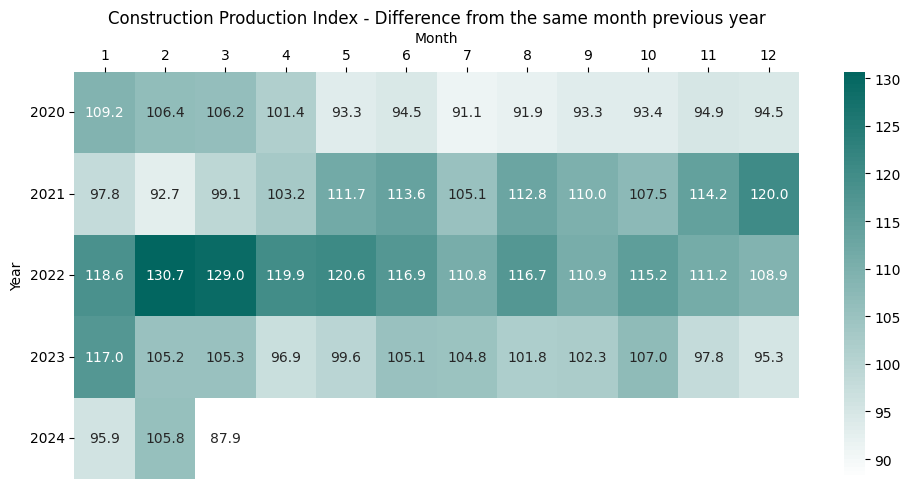

In [59]:
heatmap_monthly('Stavební práce celkem', 'blue')

In [ ]:
copi_monthly[copi_monthly['cznace_txt'] == 'Výroba počítačů, elektronických a optických přístrojů a zařízení'].sort_values(['rok', 'mesic'])